Import Libraries 

In [86]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

Load Dataset

In [87]:
df = pd.read_csv("./books.csv", on_bad_lines='warn')

/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/2650579677.py:1: ParserWarning: Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13

  df = pd.read_csv("./books.csv", on_bad_lines='warn')


In [88]:
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


Data Exploring

In [89]:
# Exploring columns, data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [90]:
# Checking for null values
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [91]:
# Checking for duplicated values
df.duplicated().sum()

np.int64(0)

Data Cleaning

In [92]:
# Values for language_code
df.language_code.value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [93]:
# Combining all ’eng' language_code
df['language_code'] = df['language_code'].replace({
    'en-US': 'eng',
    'en-GB': 'eng',
})

In [94]:
df['language_code'].value_counts()

language_code
eng      10530
spa        218
fre        144
ger         99
jpn         46
mul         19
zho         14
grc         11
por         10
en-CA        7
ita          5
lat          3
enm          3
rus          2
swe          2
nl           1
ara          1
srp          1
msa          1
glg          1
wel          1
nor          1
tur          1
gla          1
ale          1
Name: count, dtype: int64

In [95]:
# Splitting publication_date into year and month columns
df['year']=df['publication_date'].str.split('/').str[2]
df['year'] = df['year'].astype(int)
df['month']=df['publication_date'].str.split('/').str[0]
df['month'] = df['month'].astype(int)

In [96]:
# Unique values of the publisher 
df.publisher.unique()

array(['Scholastic Inc.', 'Scholastic', 'Nimble Books', ..., 'Suma',
       'Panamericana Editorial', 'Editorial Presença'], dtype=object)

In [97]:
# Combine same publishers that were spelt with different spelling or suffixes 
def normalize_publishers(df, column_name):
    """
    Combines same publishers that are spelled differently or have different suffixes.

    Parameters:
    df (pd.DataFrame): DataFrame containing book information.
    column_name (str): Name of the column containing publisher names to normalize.

    Returns:
    pd.DataFrame: Updated DataFrame with a new column 'normalized_<column_name>' containing normalized publisher names.
    """
    # Define common suffixes
    base_suffixes = ['Ltd.', 'Inc.', 'Llc.', 'Corporation.', 'Corp.', 'Co.', 'Company.']
    variants = ['', ' ', '.']

    # Create suffixes in lower, original, and upper case
    suffixes = {
        f"{suffix}{variant}"
        for suffix in base_suffixes
        for variant in variants
        for suffix in (suffix.lower(), suffix, suffix.upper())
    }


    # Function to clean publisher names for comparison
    def clean_publisher(name):
        if pd.isna(name):  # Handle NaN values
            return ""
        # Normalize by replacing " & " with " and " for comparison
        normalized_name = re.sub(r'\s*(&)\s*', ' and ', name)  # Replace "&" with "and"
        normalized_name = re.sub(r'\s*(' + '|'.join(suffixes) + r')\s*$', '', normalized_name, flags=re.IGNORECASE).strip()  # Remove suffixes
        normalized_name = re.sub(r'\s*and\s*', ' ', normalized_name, flags=re.IGNORECASE)  # Remove "and"
        normalized_name = re.sub(r'\s+', ' ', normalized_name)  # Normalize whitespace
        return normalized_name.lower()  # Normalize to lowercase for matching

    # Dictionary to hold normalized names with original casing
    normalized_dict = {}

    # Iterate over the publisher names in the specified DataFrame column
    for name in df[column_name]:
        cleaned_name = clean_publisher(name)

        # Add to the dictionary
        if cleaned_name not in normalized_dict:
            normalized_dict[cleaned_name] = name
        else:
            # Prefer the version with "&" over "and"
            if " & " in name:
                normalized_dict[cleaned_name] = name
            elif ' and ' in name and " & " not in normalized_dict[cleaned_name]:
                normalized_dict[cleaned_name] = name
            for suffix in suffixes:
                if suffix in name:
                    normalized_dict[cleaned_name] = name

    # Create a new column in the DataFrame for normalized names
    df[f'normalized_{column_name}'] = df[column_name].apply(
        lambda x: normalized_dict.get(clean_publisher(x), x)
    )

    return df

# Normalize the publishers in the DataFrame
df = normalize_publishers(df, 'publisher')

In [98]:
# Categorize books if part of a series or a boxed set 
def categorize_books(df):
    """
    Categorizes each book as part of a series or a box set based on its title.

    Parameters:
    df (pd.DataFrame): DataFrame containing book information.

    Returns:
    pd.DataFrame: Updated DataFrame with new columns 'is_part_of_series' and 'is_box_set'.
    """
    def is_part_of_series(title):
        # Check for indicators of being part of a series
        return ' #' in title
        
    def is_box_set(title):
        # Check for indicators of being part of a series
        return bool(re.search(r'#\d+-\d+', title))

    # Create new columns based on the functions
    df['is_part_of_series'] = df['title'].apply(is_part_of_series)
    df['is_box_set'] = df['title'].apply(is_box_set)

    # For titles that are box sets, ensure they are not also marked as series
    df.loc[df['is_box_set'], 'is_part_of_series'] = False

    return df

# Categorize books
df = categorize_books(df)

In [99]:
# Function to categorize books based on number of pages
def categorize_book_length(num_pages):
    if num_pages > 700:
        return 'Long'
    elif num_pages > 300:
        return 'Medium'
    else:
        return 'Short'

df['book_length'] = df['  num_pages'].apply(categorize_book_length)

In [100]:
# Dropping and renaming columns
df.drop(columns=['  num_pages', 'publisher', 'publication_date'], axis=1, inplace=True)
df.rename(columns={'normalized_publisher': 'publisher', 'oldName2': 'newName2'}, inplace=True)


In [101]:
# Function to split authors and create new rows
def separate_authors(row):
    authors = row['authors'].split('/')
    new_rows = []
    for author in authors:
        new_row = row.copy()
        new_row['authors'] = author.strip()  # Remove any extra spaces
        new_rows.append(new_row)
    return new_rows

# Create new dataframe where authors are separated 
expanded_rows = df.apply(separate_authors, axis=1)
expanded_df = pd.DataFrame([item for sublist in expanded_rows for item in sublist])



In [102]:
expanded_df[expanded_df['title']=='Twilight (Twilight  #1)']

,bookID,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,year,month,publisher,is_part_of_series,is_box_set,book_length
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,4597666,94265,2006,9,Little Brown & Company,True,False,Medium


Data Exploration (EDA)

In [103]:
# Group by title and get the highest number of text reviews for each title
most_reviews = expanded_df.groupby('title', as_index=False)['text_reviews_count'].max()
most_reviews.sort_values(by='text_reviews_count', ascending=False, inplace=True)
most_reviews.head(5)


,title,text_reviews_count
9646,Twilight (Twilight #1),94265
6886,The Book Thief,86881
7653,The Giver (The Giver #1),56604
6626,The Alchemist,55843
9876,Water for Elephants,52759


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/3466475938.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='text_reviews_count', y='title', data=most_reviews, palette='viridis')


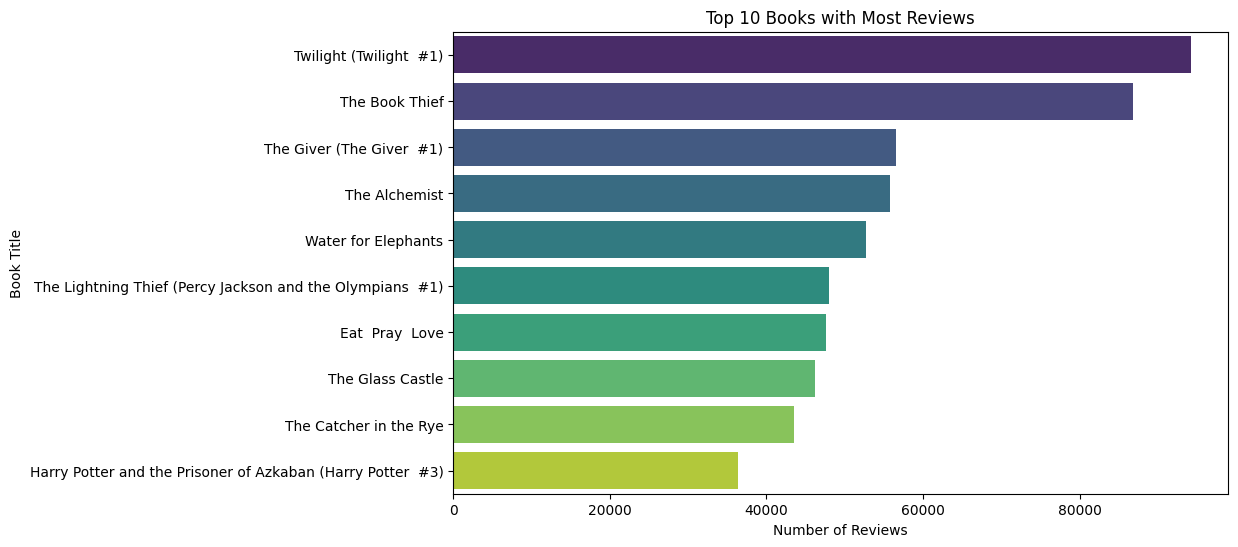

In [104]:
# Get the top 10 books with the most reviews
most_reviews = most_reviews.nlargest(10, 'text_reviews_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='text_reviews_count', y='title', data=most_reviews, palette='viridis')
plt.title('Top 10 Books with Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.show()


In [105]:
# Group by title and get the highest number of ratings count for each title
most_ratings = expanded_df.groupby('title', as_index=False)['ratings_count'].max()
most_ratings.sort_values(by='ratings_count', ascending=False, inplace=True)
most_ratings.head(5)

,title,ratings_count
9646,Twilight (Twilight #1),4597666
7802,The Hobbit or There and Back Again,2530894
7015,The Catcher in the Rye,2457092
613,Angels & Demons (Robert Langdon #1),2418736
3073,Harry Potter and the Prisoner of Azkaban (Harr...,2339585


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/2570246728.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratings_count', y='title', data=most_ratings, palette='viridis')


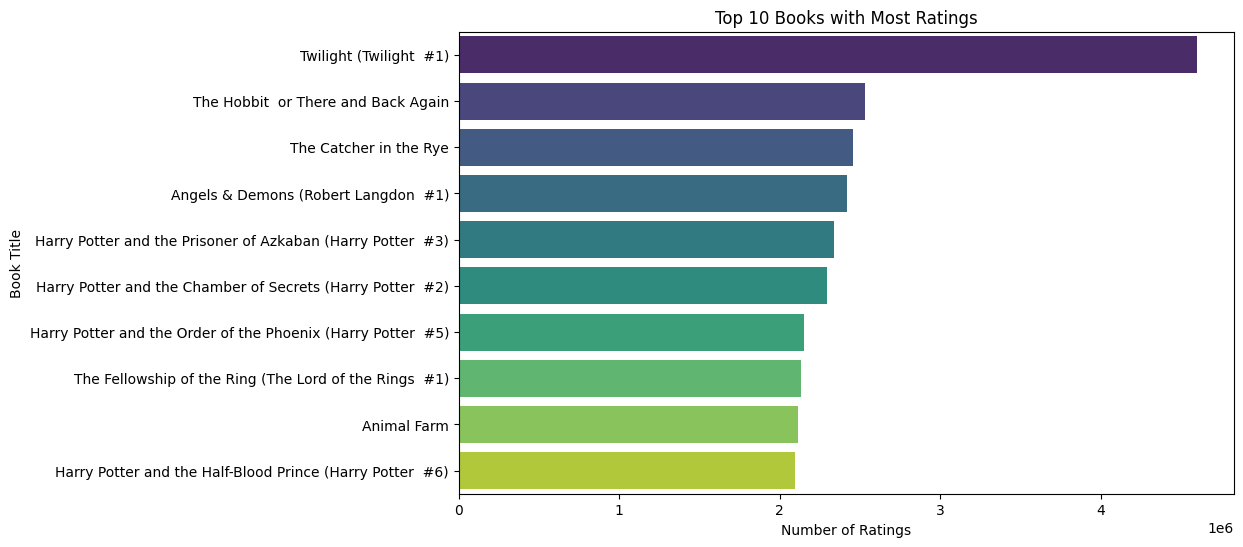

In [106]:
# Get the top 10 books with the most ratings
most_ratings = most_ratings.nlargest(10, 'ratings_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_count', y='title', data=most_ratings, palette='viridis')
plt.title('Top 10 Books with Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()


In [107]:
# Group by title and get the highest number of rating count for each author
most_authors = expanded_df.groupby('authors', as_index=False)['ratings_count'].sum()
most_authors.sort_values(by='ratings_count', ascending=False, inplace=True)
most_authors.head(5)

,authors,ratings_count
3562,J.K. Rowling,9265287
5828,Mary GrandPré,8923980
3575,J.R.R. Tolkien,5622283
8247,Stephenie Meyer,4597666
8206,Stephen King,4288299


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/456905587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratings_count', y='authors', data=most_authors, palette='viridis')


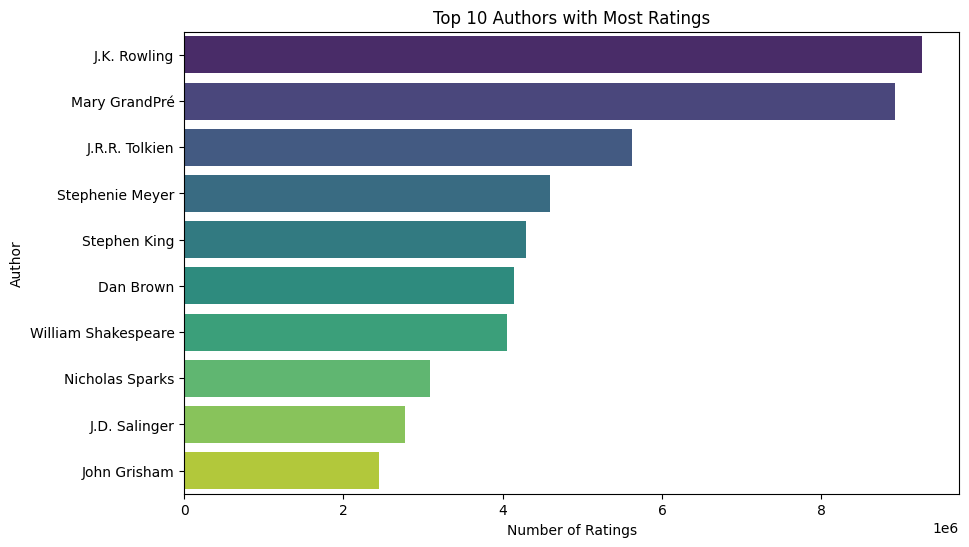

In [108]:
# Get the top 10 books with the most ratings
most_authors = most_authors.nlargest(10, 'ratings_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_count', y='authors', data=most_authors, palette='viridis')
plt.title('Top 10 Authors with Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Author')
plt.show()


In [109]:
# Count the number of books for each author
author_counts = expanded_df.groupby('authors').size().reset_index(name='book_count')
author_counts.sort_values(by='book_count', ascending=False, inplace=True)
author_counts.head(5)

,authors,book_count
8206,Stephen King,99
9104,William Shakespeare,93
3575,J.R.R. Tolkien,55
7864,Sandra Brown,48
78,Agatha Christie,47


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/917227207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='book_count', y='authors', data=author_counts, palette='viridis')


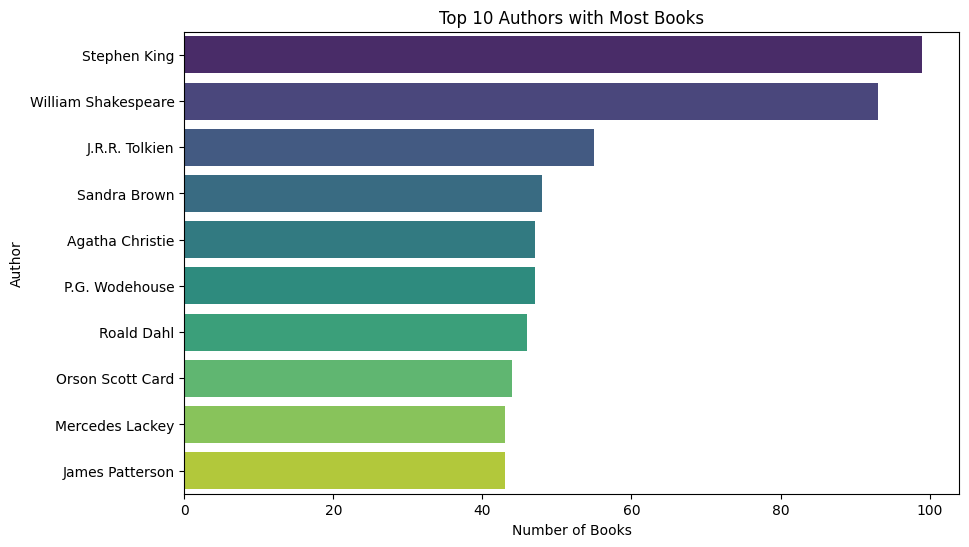

In [110]:
# Get the top 10 authors with the most book
author_counts = author_counts.nlargest(10, 'book_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='book_count', y='authors', data=author_counts, palette='viridis')
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


In [111]:
# Group by title and get the maximum average rating
high_rated_books = expanded_df.groupby('title', as_index=False).agg(
    average_rating=('average_rating', 'max'),
    ratings_count=('ratings_count', 'max')  # Get the max ratings_count for the title
)

# Sort the results by average_rating and ratings_count
high_rated_books.sort_values(by=['ratings_count', 'average_rating'], ascending=False, inplace=True)
high_rated_books.head(5)

,title,average_rating,ratings_count
9646,Twilight (Twilight #1),3.59,4597666
7802,The Hobbit or There and Back Again,4.27,2530894
7015,The Catcher in the Rye,3.80,2457092
613,Angels & Demons (Robert Langdon #1),3.89,2418736
3073,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585


In [112]:

# Count the number of books for each publisher
publisher_counts = df.groupby('publisher').size().reset_index(name='book_count')
publisher_counts.sort_values(by='book_count', ascending=False, inplace=True)
publisher_counts.head(5)


,publisher,book_count
2053,Vintage,318
1443,Penguin Books Ltd.,263
1449,Penguin Classics,184
1178,Mariner Books,150
183,Ballantine Books,145


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/796366564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='book_count', y='publisher', data=publisher_counts, palette='viridis')


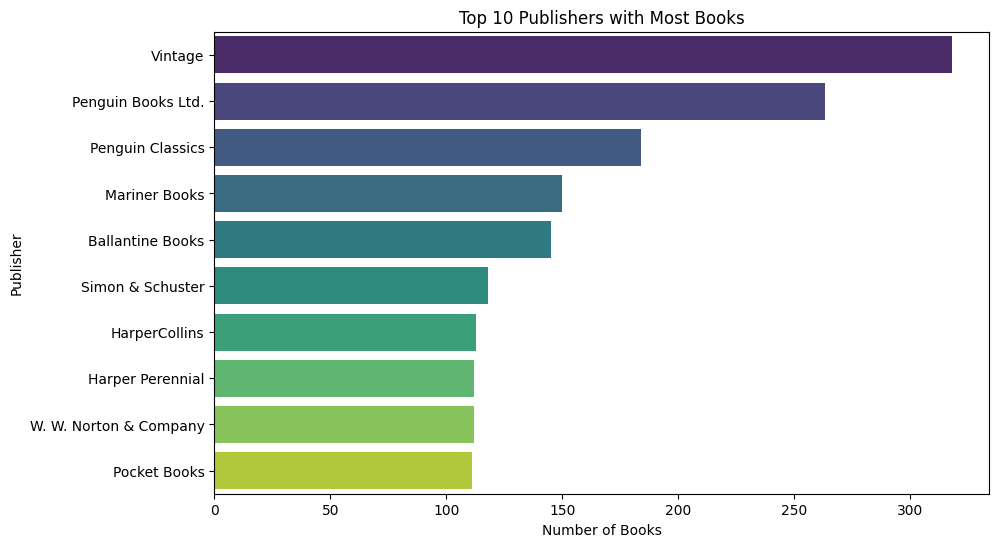

In [113]:
# Get the top 10 publisher with the most book
publisher_counts = publisher_counts.nlargest(10, 'book_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='book_count', y='publisher', data=publisher_counts, palette='viridis')
plt.title('Top 10 Publishers with Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()


In [114]:
# Count the number of books for each language_code
language_counts = df.groupby('language_code').size().reset_index(name='book_count')
language_counts.sort_values(by='book_count', ascending=False, inplace=True)
language_counts.head(5)

,language_code,book_count
3,eng,10530
19,spa,218
5,fre,144
6,ger,99
11,jpn,46


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/2145835948.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='book_count', y='language_code', data=language_counts, palette='viridis')


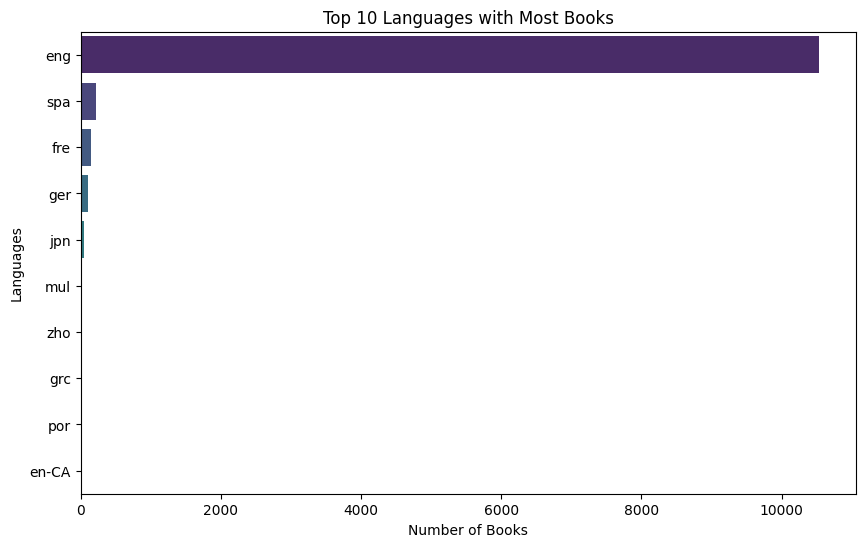

In [115]:
# Get the top 10 publisher with the most book
language_counts = language_counts.nlargest(10, 'book_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='book_count', y='language_code', data=language_counts, palette='viridis')
plt.title('Top 10 Languages with Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Languages')
plt.show()


In [116]:
# Group by book_length and calculate the average rating for each category
average_rating_per_length = df.groupby('book_length')['average_rating'].size().reset_index(name='average_rating')
average_rating_per_length.sort_values(by='average_rating', ascending=False, inplace=True)
average_rating_per_length.head(5)

,book_length,average_rating
2,Short,5584
1,Medium,4847
0,Long,692


In [117]:
# Group by book_length and calculate the average rating for each category
average_rating_per_length = df.groupby('book_length')['average_rating'].mean().reset_index(name='average_rating')
average_rating_per_length.sort_values(by='average_rating', ascending=False, inplace=True)
average_rating_per_length.head(5)

,book_length,average_rating
0,Long,4.117645
1,Medium,3.940782
2,Short,3.905505


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/2272586642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='book_length', data=average_rating_per_length, palette='viridis')


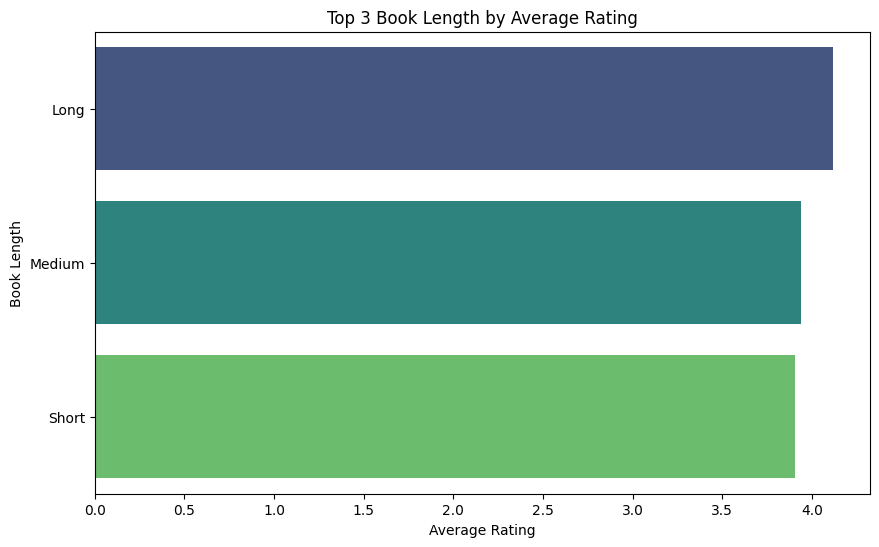

In [118]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='book_length', data=average_rating_per_length, palette='viridis')
plt.title('Top 3 Book Length by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Book Length')
plt.show()


In [119]:
year_counts = df.groupby('year').size().reset_index(name='book_count')
year_counts.sort_values(by='book_count', ascending=False, inplace=True)
year_counts.head(5)

,year,book_count
72,2006,1700
71,2005,1260
70,2004,1069
69,2003,931
68,2002,798


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/3357736613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='book_count', data=year_counts, palette='viridis')


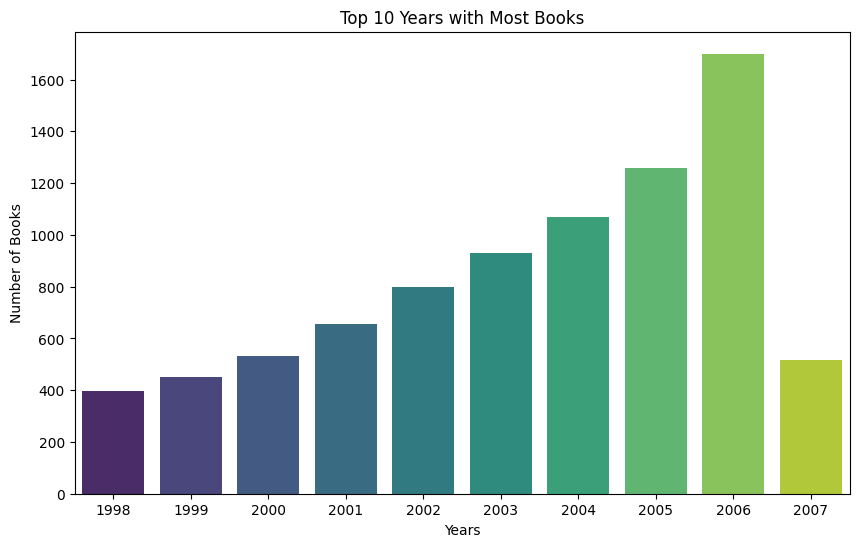

In [120]:
# Get the top 10 years with the most book
year_counts = year_counts.nlargest(10, 'book_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='book_count', data=year_counts, palette='viridis')
plt.title('Top 10 Years with Most Books')
plt.xlabel('Years')
plt.ylabel('Number of Books')
plt.show()

In [121]:
df.describe()

,bookID,average_rating,isbn13,ratings_count,text_reviews_count,year,month
count,11123.000000,11123.000000,1.112300e+04,1.112300e+04,11123.000000,11123.000000,11123.000000
mean,21310.856963,3.934075,9.759880e+12,1.794285e+04,542.048099,2000.169019,6.547874
std,13094.727252,0.350485,4.429758e+11,1.124992e+05,2576.619589,8.247227,3.413947
min,1.000000,0.000000,8.987060e+09,0.000000e+00,0.000000,1900.000000,1.000000
25%,10277.500000,3.770000,9.780345e+12,1.040000e+02,9.000000,1998.000000,4.000000
50%,20287.000000,3.960000,9.780582e+12,7.450000e+02,47.000000,2003.000000,7.000000
75%,32104.500000,4.140000,9.780872e+12,5.000500e+03,238.000000,2005.000000,10.000000
max,45641.000000,5.000000,9.790008e+12,4.597666e+06,94265.000000,2020.000000,12.000000


In [122]:
month_counts = df.groupby('month').size().reset_index(name='book_count')
month_counts.sort_values(by='book_count', ascending=False, inplace=True)
month_counts.head(5)

,month,book_count
8,9,1278
9,10,1212
0,1,1057
3,4,991
4,5,922


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_67973/893986621.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='book_count', y='language_code', data=language_counts, palette='viridis')


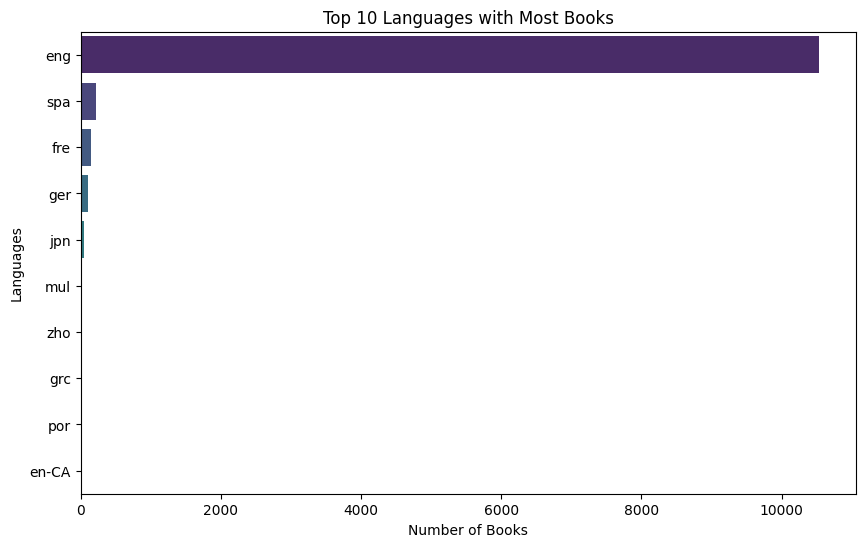

In [123]:
# Get the top 10 publisher with the most book
language_counts = language_counts.nlargest(10, 'book_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='book_count', y='language_code', data=language_counts, palette='viridis')
plt.title('Top 10 Languages with Most Books')
plt.xlabel('Number of Books')
plt.ylabel('Languages')
plt.show()

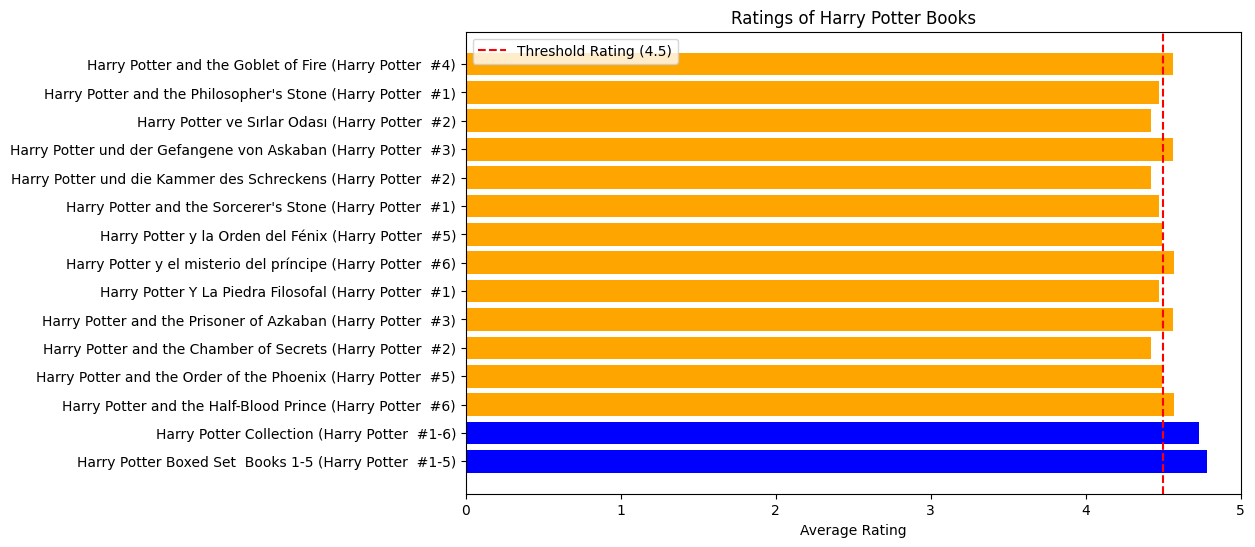

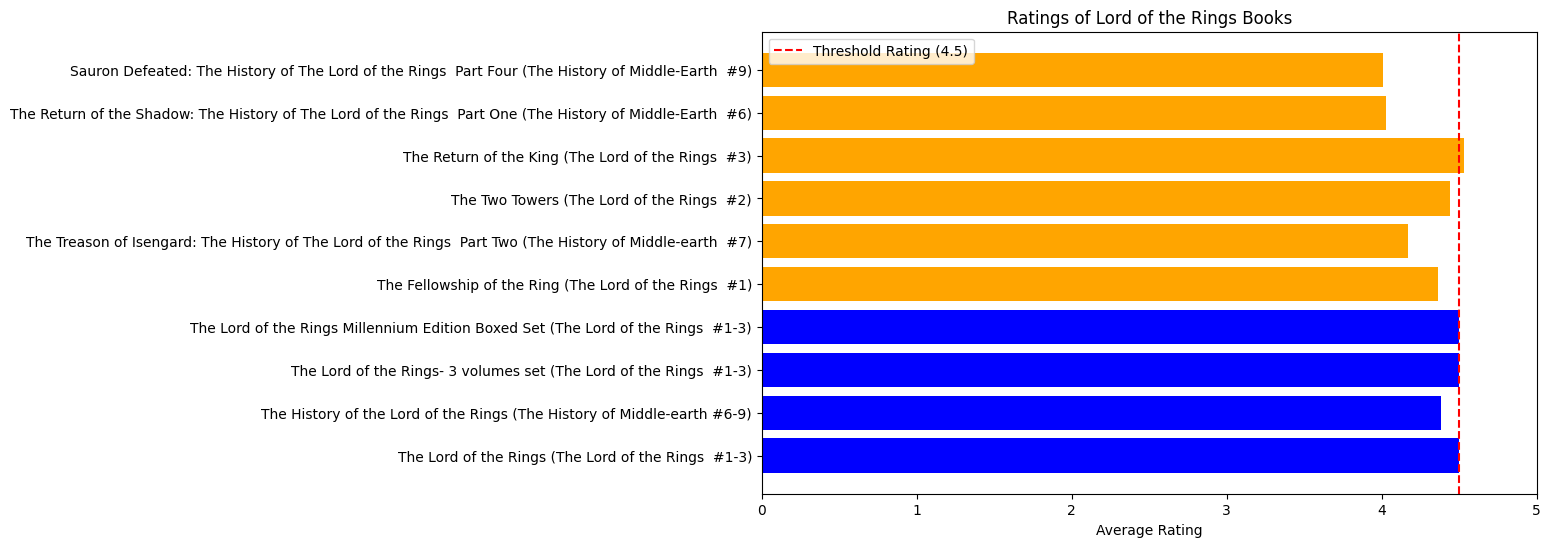

In [124]:
# Filter for Harry Potter and Lord of the Rings books
hp_books = df[df['title'].str.contains('Harry Potter', case=False)]
lotr_books = df[df['title'].str.contains('Lord of the Rings', case=False)]

# Get all boxed sets and individual series for Harry Potter
hp_boxed_sets = hp_books[hp_books['is_box_set'] == True]
hp_individual_series = hp_books[(hp_books['is_part_of_series'] == True) & (hp_books['is_box_set'] == False)]

# Get all boxed sets and individual series for Lord of the Rings
lotr_boxed_sets = lotr_books[lotr_books['is_box_set'] == True]
lotr_individual_series = lotr_books[(lotr_books['is_part_of_series'] == True) & (lotr_books['is_box_set'] == False)]

# Function to plot
def plot_books(books, title):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(books['title'], books['average_rating'], color=['blue' if x == 'Boxed Set' else 'orange' for x in books['category']])
    plt.title(f'Ratings of {title}')
    plt.xlabel('Average Rating')
    plt.xlim(0, 5)  # Assuming ratings are on a scale of 0 to 5
    plt.axvline(x=4.5, color='red', linestyle='--', label='Threshold Rating (4.5)')
    plt.legend()

    for bar, category in zip(bars, books['category']):
        bar.set_label(category)

    plt.show()

# Plot Harry Potter books
hp_combined = pd.concat([hp_boxed_sets.assign(category='Boxed Set'), 
                         hp_individual_series.assign(category='Individual Series')])
plot_books(hp_combined, 'Harry Potter Books')

# Plot Lord of the Rings books
lotr_combined = pd.concat([lotr_boxed_sets.assign(category='Boxed Set'), 
                           lotr_individual_series.assign(category='Individual Series')])
plot_books(lotr_combined, 'Lord of the Rings Books')

Exporting dataset

In [125]:
df.to_csv('./duplicated_author_goodsread.csv', index=False)
expanded_df.to_csv('./singular_author_goodsread.csv', index=False)

In [135]:
df[df['authors']=="Dan Brown"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,year,month,publisher,is_part_of_series,is_box_set,book_length
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,2418736,21303,2006,4,Pocket Books,True,False,Long
308,965,Ángeles y demonios (Robert Langdon #1),Dan Brown,3.89,849561877X,9788495618771,spa,196,20,2005,12,Umbriel,True,False,Medium
310,968,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0307277674,9780307277671,eng,1679706,35877,2006,3,Anchor,True,False,Medium
311,969,The Da Vinci Code,Dan Brown,3.84,076792603X,9780767926034,eng,1120,105,2006,3,Broadway Books,False,False,Medium
313,975,Deception Point,Dan Brown,3.71,1416524800,9781416524809,eng,4919,410,2006,4,Pocket Books,False,False,Long
314,977,Deception Point,Dan Brown,3.71,0552151769,9780552151764,eng,3353,183,2004,5,Corgi Books,False,False,Medium
315,980,Deception Point,Dan Brown,3.71,0593055071,9780593055076,eng,61,4,2005,8,Bantam Press,False,False,Medium
1225,4223,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0739326740,9780739326749,eng,3645,407,2006,3,Random House Large Print,True,False,Long
1226,4227,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,0743275063,9780743275064,eng,1192,143,2005,5,Atria Books,True,False,Medium
1229,4248,The Da Vinci Code,Dan Brown,3.84,1400079179,9781400079179,eng,13934,1459,2006,3,Anchor,False,False,Medium
